In [1]:
!pip install scikit-learn nltk pandas datasets -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which is incompatible.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 16.1.0 which is incompatible.


In [2]:
import nltk
import matplotlib.pyplot as plt
import os
import pandas as pd
import string
from datasets import load_dataset
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
# Define function to clean text
def clean_text(text):
    # Lowercasing
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove stopwords and lemmatize
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Join tokens back to string
    text = ' '.join(tokens)

    return text


In [5]:
# Define function to preprocess data
def preprocess_data(data_link, output_dir, splits, attr):
    # Load dataset
    dataset = load_dataset(data_link)  # Adjust as per your dataset loading mechanism

    # Save the dataset as CSV
    for split in splits:
        df = pd.DataFrame(dataset[split])

        # Null values
        print(f'\n\t{split}\nNull Values:')
        print(df.isnull().sum())

        # Stats
        print('\nStatistics:\n')
        print(df[attr[0]].apply(len).describe())
        if len(attr) > 1:
            print(df[attr[1]].apply(len).describe())

            # Histogram for summary length
            plt.hist(df[attr[1]].apply(len), bins=100)
            plt.xlabel("Summary length")
            plt.ylabel("Frequency")
            plt.title("Summary")
            plt.show()

        # Histogram for text length
        plt.hist(df[attr[0]].apply(len), bins=100)
        plt.xlabel("Text length")
        plt.ylabel("Frequency")
        plt.title("Text")
        plt.show()

        df.to_csv(os.path.join(output_dir, f'{split}.csv'), index=False)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/110 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/20 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7 [00:00<?, ? examples/s]


	train
Null Values:
Dialogue     0
Summaries    0
dtype: int64

Statistics:

count      110.000000
mean     27792.954545
std      10954.476259
min       6264.000000
25%      17338.250000
50%      29186.500000
75%      36076.500000
max      51744.000000
Name: Dialogue, dtype: float64
count     110.000000
mean     1750.263636
std       525.321827
min       501.000000
25%      1481.750000
50%      1746.000000
75%      2032.250000
max      3750.000000
Name: Summaries, dtype: float64


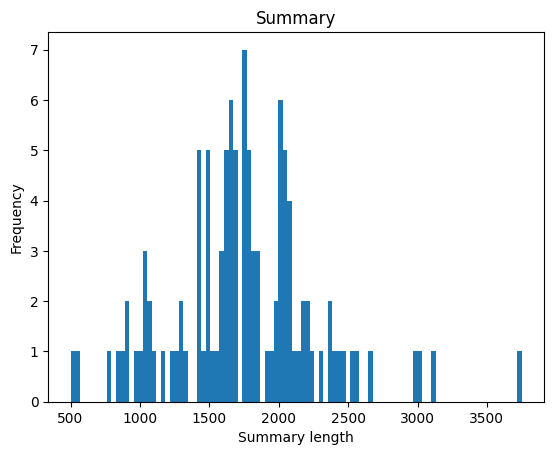

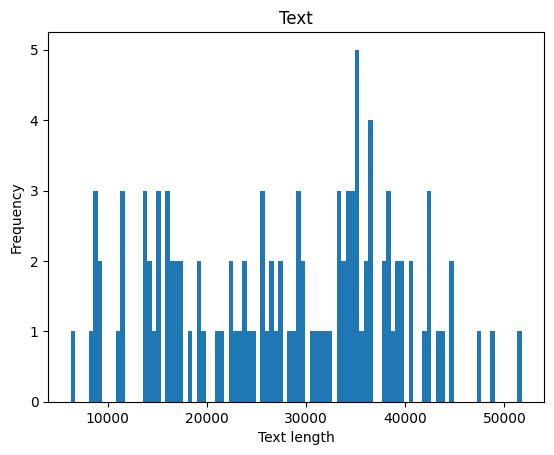


	validation
Null Values:
Dialogue     0
Summaries    0
dtype: int64

Statistics:

count       20.000000
mean     26612.350000
std       9232.148722
min      11595.000000
25%      21885.750000
50%      27087.500000
75%      31359.500000
max      47263.000000
Name: Dialogue, dtype: float64
count      20.000000
mean     1751.300000
std       602.660776
min       908.000000
25%      1257.500000
50%      1900.500000
75%      2077.000000
max      3373.000000
Name: Summaries, dtype: float64


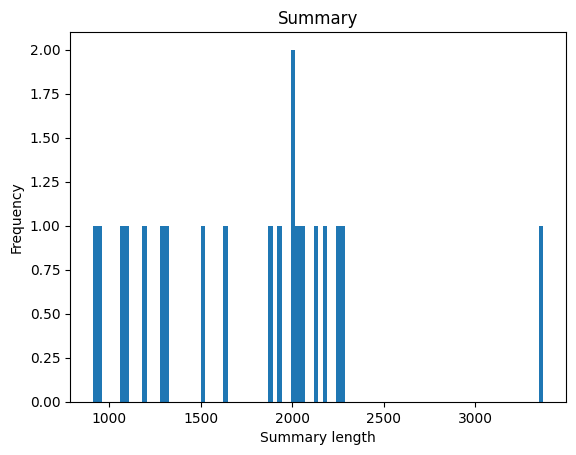

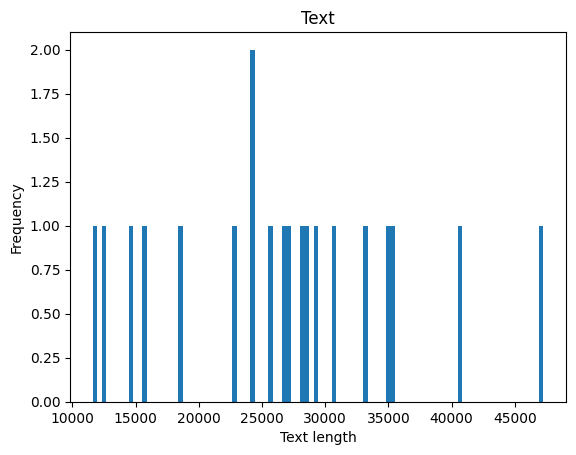


	test
Null Values:
Dialogue     0
Summaries    0
dtype: int64

Statistics:

count        7.000000
mean     26476.285714
std      15207.224990
min       4392.000000
25%      14576.500000
50%      34013.000000
75%      37250.500000
max      43275.000000
Name: Dialogue, dtype: float64
count       7.000000
mean     1882.428571
std       775.206393
min       804.000000
25%      1481.000000
50%      1899.000000
75%      2114.500000
max      3283.000000
Name: Summaries, dtype: float64


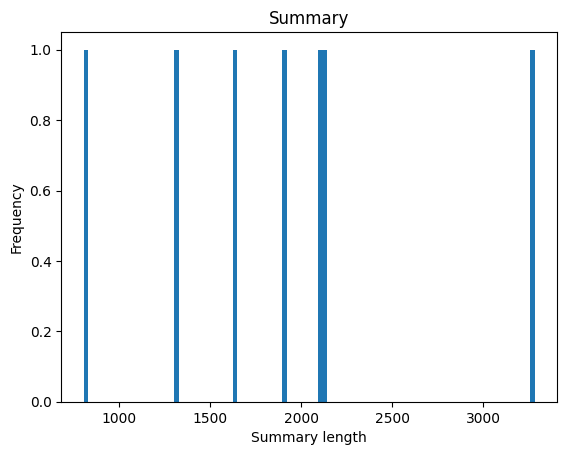

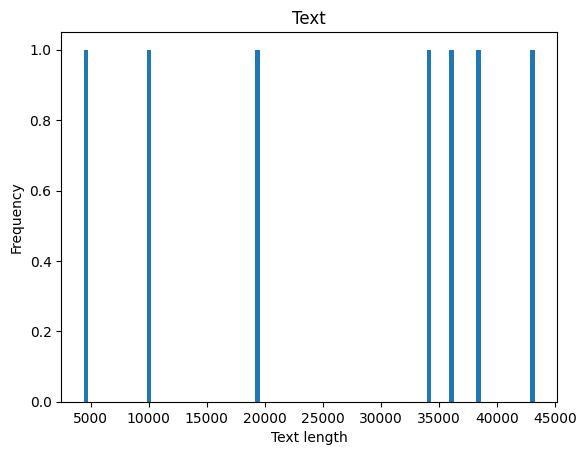

In [6]:
# Example usage

# Dataset and output directory
data_link = "TanveerAman/AMI-Corpus-Text-Summarization"
output_dir = '/content/data'

# Split names and attribute names
splits = ['train', 'validation', 'test']
attr = ['Dialogue', 'Summaries']

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Preprocess data
preprocess_data(data_link, output_dir, splits, attr)

# After preprocessing, continue with the rest of your data processing steps as before


In [7]:
# Load processed data
train_df = pd.read_csv(os.path.join(output_dir, 'train.csv'))
validation_df = pd.read_csv(os.path.join(output_dir, 'validation.csv'))
test_df = pd.read_csv(os.path.join(output_dir, 'test.csv'))

# Rename columns
train_df.rename(columns={'Dialogue': 'text', 'Summaries': 'summary'}, inplace=True)
validation_df.rename(columns={'Dialogue': 'text', 'Summaries': 'summary'}, inplace=True)
test_df.rename(columns={'Dialogue': 'text', 'Summaries': 'summary'}, inplace=True)


In [8]:
# Concatenate datasets
merged_df = pd.concat([train_df, validation_df, test_df], ignore_index=True)


In [9]:
# Display statistics
print("Text Length Statistics:")
print(merged_df['text'].apply(len).describe())
print("\nSummary Length Statistics:")
print(merged_df['summary'].apply(len).describe())


Text Length Statistics:
count      137.000000
mean     27553.328467
std      10886.845197
min       4392.000000
25%      17444.000000
50%      28381.000000
75%      35559.000000
max      51744.000000
Name: text, dtype: float64

Summary Length Statistics:
count     137.000000
mean     1757.167883
std       547.065723
min       501.000000
25%      1435.000000
50%      1757.000000
75%      2042.000000
max      3750.000000
Name: summary, dtype: float64


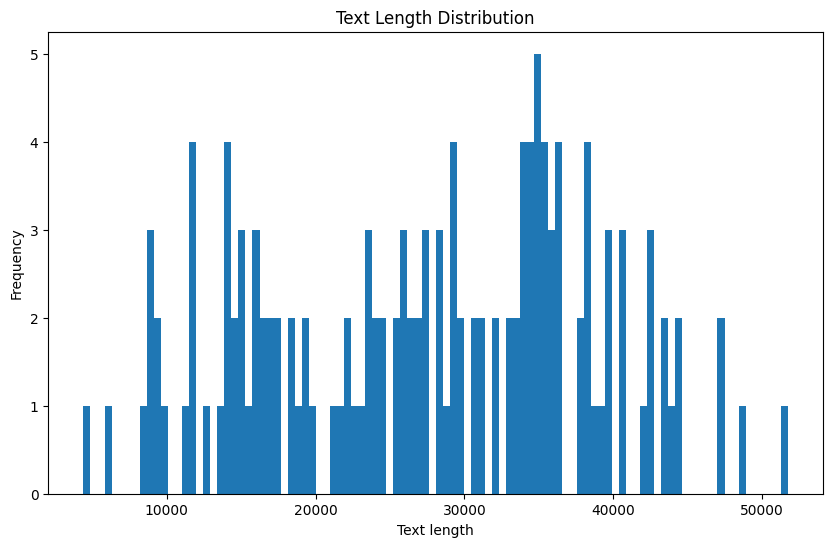

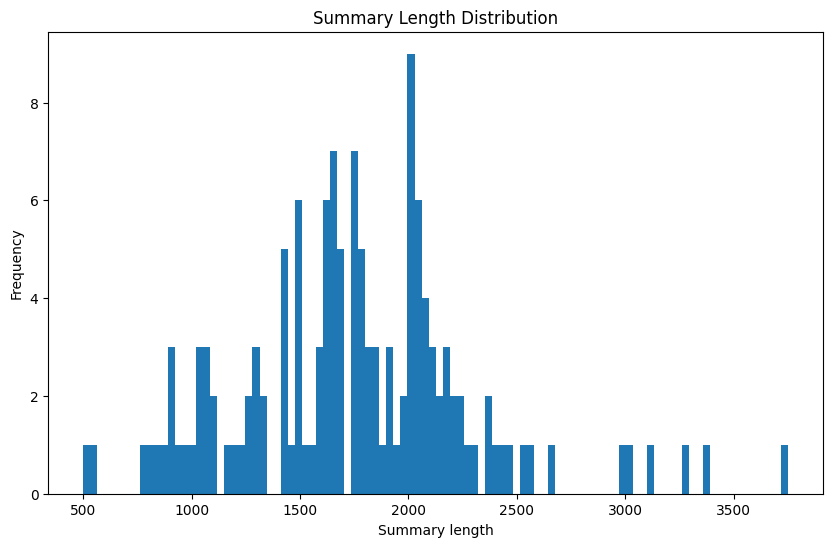

In [10]:
# Histograms
plt.figure(figsize=(10, 6))
plt.hist(merged_df['text'].apply(len), bins=100)
plt.xlabel("Text length")
plt.ylabel("Frequency")
plt.title("Text Length Distribution")
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(merged_df['summary'].apply(len), bins=100)
plt.xlabel("Summary length")
plt.ylabel("Frequency")
plt.title("Summary Length Distribution")
plt.show()


In [11]:
!pip install transformers


In [12]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BartTokenizer, BartForConditionalGeneration, AdamW, get_scheduler
from tqdm.auto import tqdm


In [13]:
class SummarizationDataset(Dataset):
    def __init__(self, file_path, tokenizer, max_length=512):
        self.dataset = pd.read_csv(file_path)
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        text = self.dataset.iloc[idx, 0]
        summary = self.dataset.iloc[idx, 1]

        inputs = self.tokenizer.encode_plus(
            text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors="pt"
        )
        targets = self.tokenizer.encode_plus(
            summary,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors="pt"
        )

        return {
            'input_ids': inputs['input_ids'].flatten(),
            'attention_mask': inputs['attention_mask'].flatten(),
            'labels': targets['input_ids'].flatten()
        }

# Initialize BART tokenizer
tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

In [14]:
# Dataset paths
train_file = '/content/data/train.csv'
val_file = '/content/data/validation.csv'
test_file = '/content/data/test.csv'

# Create datasets and data loaders
train_dataset = SummarizationDataset(train_file, tokenizer)
val_dataset = SummarizationDataset(val_file, tokenizer)
test_dataset = SummarizationDataset(test_file, tokenizer)

batch_size = 2
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [15]:
import torch
from transformers import BartForConditionalGeneration

# Check if GPU is available and set the device accordingly
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize BART model
model = BartForConditionalGeneration.from_pretrained('facebook/bart-base')
model = model.to(device)

print(f'Model loaded on {device}')


model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

Model loaded on cuda


In [16]:
# Initialize BART model
model = BartForConditionalGeneration.from_pretrained('facebook/bart-base')
model = model.to(device)


In [17]:
# Define optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=0.001)
num_epochs = 3
num_training_steps = num_epochs * len(train_loader)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps
)


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [18]:
import time

In [19]:
# Training loop
model.train()

start_time = time.time()
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    epoch_start_time = time.time()
    total_loss = 0

    for step, batch in enumerate(train_loader):

        inputs = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=inputs, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

        total_loss += loss.item()

        current_lr = lr_scheduler.get_last_lr()[0]
        print(f"Epoch {epoch + 1} | Step {step + 1}/{len(train_loader)} | "
              f"Batch Loss: {loss.item():.4f} | Learning Rate: {current_lr:.6f}")

    avg_loss = total_loss / len(train_loader)
    epoch_time = time.time() - epoch_start_time
    print(f"Epoch {epoch + 1} completed. Average Loss: {avg_loss:.4f} | "
          f"Epoch Time: {epoch_time:.2f}s")

total_training_time = time.time() - start_time
print(f"Training completed in {total_training_time:.2f}s")


Epoch 1/3
Epoch 1 | Step 1/55 | Batch Loss: 9.0558 | Learning Rate: 0.000994
Epoch 1 | Step 2/55 | Batch Loss: 13.6013 | Learning Rate: 0.000988
Epoch 1 | Step 3/55 | Batch Loss: 12.1466 | Learning Rate: 0.000982
Epoch 1 | Step 4/55 | Batch Loss: 9.2809 | Learning Rate: 0.000976
Epoch 1 | Step 5/55 | Batch Loss: 8.6391 | Learning Rate: 0.000970
Epoch 1 | Step 6/55 | Batch Loss: 8.8914 | Learning Rate: 0.000964
Epoch 1 | Step 7/55 | Batch Loss: 8.2029 | Learning Rate: 0.000958
Epoch 1 | Step 8/55 | Batch Loss: 8.4322 | Learning Rate: 0.000952
Epoch 1 | Step 9/55 | Batch Loss: 7.7151 | Learning Rate: 0.000945
Epoch 1 | Step 10/55 | Batch Loss: 7.0650 | Learning Rate: 0.000939
Epoch 1 | Step 11/55 | Batch Loss: 6.5530 | Learning Rate: 0.000933
Epoch 1 | Step 12/55 | Batch Loss: 6.5460 | Learning Rate: 0.000927
Epoch 1 | Step 13/55 | Batch Loss: 5.6835 | Learning Rate: 0.000921
Epoch 1 | Step 14/55 | Batch Loss: 4.4914 | Learning Rate: 0.000915
Epoch 1 | Step 15/55 | Batch Loss: 5.4440 | L

In [20]:
# Save the fine-tuned model and tokenizer
output_dir = "/content/fine_tuned_bart"
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


('/content/fine_tuned_bart/tokenizer_config.json',
 '/content/fine_tuned_bart/special_tokens_map.json',
 '/content/fine_tuned_bart/vocab.json',
 '/content/fine_tuned_bart/merges.txt',
 '/content/fine_tuned_bart/added_tokens.json')

In [21]:
# If starting from a previously saved model
model_path = '/content/fine_tuned_bart'
model = BartForConditionalGeneration.from_pretrained(model_path)
tokenizer = BartTokenizer.from_pretrained(model_path)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

optimizer = AdamW(model.parameters(), lr=0.001)


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [22]:
# Evaluation loop
model.eval()
total_eval_loss = 0
eval_start_time = time.time()

with torch.no_grad():
    for step, batch in enumerate(val_loader):
        batch_start_time = time.time()
        inputs = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=inputs, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        total_eval_loss += loss.item()

        batch_time = time.time() - batch_start_time
        print(f"Validation Step {step + 1}/{len(val_loader)} | "
              f"Batch Loss: {loss.item():.4f} | Batch Time: {batch_time:.2f}s")

avg_eval_loss = total_eval_loss / len(val_loader)

eval_time = time.time() - eval_start_time

print(f"Validation Loss: {avg_eval_loss:.4f} | Evaluation Time: {eval_time:.2f}s")


Validation Step 1/10 | Batch Loss: 3.1713 | Batch Time: 0.14s
Validation Step 2/10 | Batch Loss: 5.2949 | Batch Time: 0.09s
Validation Step 3/10 | Batch Loss: 3.3949 | Batch Time: 0.08s
Validation Step 4/10 | Batch Loss: 5.6508 | Batch Time: 0.08s
Validation Step 5/10 | Batch Loss: 5.8795 | Batch Time: 0.08s
Validation Step 6/10 | Batch Loss: 3.8348 | Batch Time: 0.08s
Validation Step 7/10 | Batch Loss: 4.8899 | Batch Time: 0.08s
Validation Step 8/10 | Batch Loss: 4.1938 | Batch Time: 0.08s
Validation Step 9/10 | Batch Loss: 3.2081 | Batch Time: 0.08s
Validation Step 10/10 | Batch Loss: 5.1651 | Batch Time: 0.08s
Validation Loss: 4.4683 | Evaluation Time: 1.59s


In [23]:
# Save evaluation results
evaluation_results = {
    "Validation Loss": avg_eval_loss,
    "Evaluation Time (s)": eval_time
}

# Convert the results dictionary to a DataFrame
df_eval_results = pd.DataFrame([evaluation_results])

# Save the DataFrame to a CSV file
df_eval_results.to_csv('/content/evaluation_results.csv', index=False)

In [24]:
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from transformers import BartTokenizer

class SummarizationDataset(Dataset):
    def __init__(self, file_path, tokenizer, max_length=512):
        self.dataset = pd.read_csv(file_path)
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        text = self.dataset.iloc[idx, 0]
        summary = self.dataset.iloc[idx, 1]

        inputs = self.tokenizer.encode_plus(
            text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors="pt"
        )
        targets = self.tokenizer.encode_plus(
            summary,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors="pt"
        )

        return {
            'input_ids': inputs['input_ids'].flatten(),
            'attention_mask': inputs['attention_mask'].flatten(),
            'labels': targets['input_ids'].flatten()
        }

tokenizer = BartTokenizer.from_pretrained('facebook/bart-large')
val_dataset = SummarizationDataset('/content/evaluation_results.csv', tokenizer)
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False)


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

In [25]:
import torch
from transformers import BartForConditionalGeneration

model_path = '/content/fine_tuned_bart'
model = BartForConditionalGeneration.from_pretrained(model_path)
tokenizer = BartTokenizer.from_pretrained(model_path)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


BartForConditionalGeneration(
  (model): BartModel(
    (shared): Embedding(50265, 768, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): BartScaledWordEmbedding(50265, 768, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 768)
      (layers): ModuleList(
        (0-5): 6 x BartEncoderLayer(
          (self_attn): BartSdpaAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=True)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
          (final_layer_norm): Laye

In [26]:
!pip install -U transformers
!pip install -U datasets
!pip install tensorboard
!pip install sentencepiece
!pip install accelerate
!pip install evaluate
!pip install rouge_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 8.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [27]:
from transformers import BartTokenizer, BartForConditionalGeneration

import glob
import pprint
import pyarrow as pa
import pyarrow.dataset as ds
import pandas as pd
from datasets import Dataset


pp = pprint.PrettyPrinter()

In [28]:
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large')
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large')

pytorch_model.bin:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

In [29]:
def summarize_text(text, model, tokenizer, max_length=512, num_beams=5):
    # Preprocess the text
    inputs = tokenizer.encode(
        "summarize: " + text,
        return_tensors='pt',
        max_length=max_length,
        truncation=True
    )

    # Generate the summary
    summary_ids = model.generate(
        inputs,
        max_length=50,
        num_beams=num_beams,
        # early_stopping=True,
    )

    # Decode and return the summary
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

In [30]:
import torch
import pprint
import evaluate
import numpy as np

from transformers import (
    BartTokenizer,
    BartForConditionalGeneration,
    TrainingArguments,
    Trainer
)

In [31]:
dataset_train = pd.read_csv('/content/data/train.csv')
dataset_valid = pd.read_csv('/content/data/validation.csv')

df1 = pd.read_csv('/content/data/train.csv')
dataset1 = ds.dataset(pa.Table.from_pandas(df1).to_batches())

### convert to Huggingface dataset
dataset_train = Dataset(pa.Table.from_pandas(df1))
print(dataset_train.__class__)

df2 = pd.read_csv('/content/data/validation.csv')
dataset1 = ds.dataset(pa.Table.from_pandas(df2).to_batches())
dataset_valid = Dataset(pa.Table.from_pandas(df2))
print(dataset_valid.__class__)

<class 'datasets.arrow_dataset.Dataset'>
<class 'datasets.arrow_dataset.Dataset'>


In [32]:
print(dataset_train)
print(dataset_valid)

Dataset({
    features: ['Dialogue', 'Summaries'],
    num_rows: 110
})
Dataset({
    features: ['Dialogue', 'Summaries'],
    num_rows: 20
})


In [33]:
MODEL = 'facebook/bart-large'
BATCH_SIZE = 2
NUM_PROCS = 2
EPOCHS = 3
OUT_DIR = '/content/fine_tuned_Text_Summ'
MAX_LENGTH = 512

In [34]:
# Print the first few rows of the dataset to see the available columns
print(dataset_train.column_names)
print(dataset_valid.column_names)

print(dataset_train[0])
print(dataset_valid[0])


['Dialogue', 'Summaries']
['Dialogue', 'Summaries']
{'Dialogue': "A: .\nA: Okay .\nA: Uh good afternoon .\nD: Good afternoon .\nA: This is our third meeting already .\nA: I hope you enjoyed your lunch .\nA: I did anyway .\nA: Um let's see .\nA: Presentation three .\nA: Okay this is um the second phase uh we're going to discuss today .\nA: It's the conceptual design meeting .\nA: And a few points of interest in this meeting um are the conceptual specification of components .\nA: Uh conceptual specification of design .\nA: And also trend-watching .\nA: Um these are hopefully the points you addressed in uh your pre uh presentations you're going to show me in a few minutes .\nA: Um but first I'll show you the agenda .\nA: Uh first the opening .\nA: Then we have three presentations .\nA: Uh after that we have to come to a decision on remote control concepts .\nA: How we're going to make it .\nA: And then we're closing .\nA: We have about forty minutes .\nA: Uh so I suggest let's get started

In [35]:
from transformers import BartTokenizer

# Initialize the tokenizer
tokenizer = BartTokenizer.from_pretrained(MODEL)

# Function to convert text data into model inputs and targets
def preprocess_function(examples):
    inputs = [f"summarize: {article}" for article in examples['Dialogue']]
    model_inputs = tokenizer(
        inputs,
        max_length=MAX_LENGTH,
        truncation=True,
        padding='max_length'
    )

    # Set up the tokenizer for targets
    targets = [summary for summary in examples['Summaries']]
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(
            targets,
            max_length=MAX_LENGTH,
            truncation=True,
            padding='max_length'
        )

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# Apply the function to the whole dataset
tokenized_train = dataset_train.map(
    preprocess_function,
    batched=True,
    num_proc=NUM_PROCS
)
tokenized_valid = dataset_valid.map(
    preprocess_function,
    batched=True,
    num_proc=NUM_PROCS
)


/usr/local/lib/python3.10/dist-packages/multiprocess/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Map (num_proc=2):   0%|          | 0/110 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/multiprocess/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3946: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3946: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword ar

Map (num_proc=2):   0%|          | 0/20 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3946: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3946: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


In [36]:
model = BartForConditionalGeneration.from_pretrained(MODEL)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
# Total parameters and trainable parameters.
total_params = sum(p.numel() for p in model.parameters())
print(f"{total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"{total_trainable_params:,} training parameters.")

406,291,456 total parameters.
406,291,456 training parameters.


In [37]:
rouge = evaluate.load("rouge")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred.predictions[0], eval_pred.label_ids

    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    result = rouge.compute(
        predictions=decoded_preds,
        references=decoded_labels,
        use_stemmer=True,
        rouge_types=[
            'rouge1',
            'rouge2',
            'rougeL'
        ]
    )

    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
    result["gen_len"] = np.mean(prediction_lens)

    return {k: round(v, 4) for k, v in result.items()}

In [38]:
def preprocess_logits_for_metrics(logits, labels):
    """
    Original Trainer may have a memory leak.
    This is a workaround to avoid storing too many tensors that are not needed.
    """
    pred_ids = torch.argmax(logits[0], dim=-1)
    return pred_ids, labels

In [39]:
pip install transformers

In [40]:
pip install transformers[torch]

In [41]:
pip install accelerate -U

In [42]:
pip install pytorch

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
ERROR: Could not build wheels for pytorch, which is required to install pyproject.toml-based projects


In [43]:
pip install trainer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.2/51.2 kB 1.5 MB/s eta 0:00:00


In [44]:
pip install accelerate>=0.21.0

In [45]:
!pip install transformers --upgrade
!pip install torch --upgrade
!pip install accelerate --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 MB 7.1 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 2.3.0
    Uninstalling triton-2.3.0:
      Successfully uninstalled triton-2.3.0
  Attempting uninstall: torch
    Found existing installation: torch 2.3.0+cu121
    Uninstalling torch-2.3.0+cu121:
      Successfully uninstalled torch-2.3.0+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.3.0+cu121 requires torch==2.3.0, but you have torch 2.3.1 which is incompatible.
torchvision 0.18.0+cu121 requires torch==2.3.0, but you have torch 2.3.1 which is incompatible.


In [46]:
import transformers
import torch
import accelerate

print(transformers.__version__)
print(torch.__version__)
print(accelerate.__version__)


4.41.2
2.3.0+cu121
0.31.0


In [48]:
import pandas as pd
import torch
from transformers import BartForConditionalGeneration, BartTokenizer
from datasets import load_metric

In [50]:
validation_data = pd.read_csv('/content/data/validation.csv')

input_texts = validation_data['Dialogue'].tolist()
target_texts = validation_data['Summaries'].tolist()

In [51]:
validation_data

,Dialogue,Summaries
0,D: Are you sure I got it all head's kinda smal...,The Project Manager presented the project to t...
1,A: .\nB: .\nB: Hmm .\nA: Good morning everybod...,The Project Manager introduced the project to ...
2,A: .\nA: .\nA: .\nC: .\nD: .. .\nC: Okay .\nC:...,The project manager opens the meeting by going...
3,A: Okay .\nA: Good afternoon again .\nA: So we...,The project manager goes through the minutes o...
4,A: .\nA: .\nB: .\nC: .\nD: .\nD: It's Play-Doh...,The interface specialist and industrial design...
5,C: Okay .\nA: Okay everyone's ready .\nB: Hell...,The User Interface Designer presented the majo...
6,"A: Hello , uh this meeting we are it's fo shou...",The project manager stated that the goal for t...
7,C: .\nA: Did you get my email with the slides ...,As the meeting opens the project manager tells...
8,D: .\nD: .\nD: .\nD: .\nA: Wait for the market...,Customers are willing to pay more for fancier ...
9,A: Okay everybody is ready ?\nA: Good morning ...,The project manager opens the meeting stating ...


In [52]:
# Load the ROUGE metric
rouge = load_metric('rouge')

# Function to generate summaries
def generate_summary(text):
    inputs = tokenizer(text, return_tensors="pt", max_length=512, truncation=True).to(device)
    summary_ids = model.generate(inputs.input_ids, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Generate summaries for the validation set
generated_summaries = [generate_summary(text) for text in input_texts]

validation_data['generated_summary'] = generated_summaries

<ipython-input-52-a264a7ba2242>:2: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  rouge = load_metric('rouge')


The repository for rouge contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/rouge.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


In [53]:
rouge_scores = rouge.compute(predictions=generated_summaries, references=target_texts)

In [54]:
for key, value in rouge_scores.items():
    print(f"{key}: {value.mid}")

rouge1: Score(precision=0.30631719105512006, recall=0.07158111441049078, fmeasure=0.10544360313041976)
rouge2: Score(precision=0.034504170002063336, recall=0.011493431708308365, fmeasure=0.016818798508202868)
rougeL: Score(precision=0.23119196227206557, recall=0.044973979402901765, fmeasure=0.0664972952779263)
rougeLsum: Score(precision=0.2805989544515213, recall=0.06075988455078623, fmeasure=0.09016894093956568)


In [55]:
validation_data.to_csv('/content/data/gen_summ.csv', index=False)
validation_data

,Dialogue,Summaries,generated_summary
0,D: Are you sure I got it all head's kinda smal...,The Project Manager presented the project to t...,D: Are you sure I got it all head's kinda smal...
1,A: .\nB: .\nB: Hmm .\nA: Good morning everybod...,The Project Manager introduced the project to ...,A:. petertoddB:.�B: Hmm. petertoddA: Good morn...
2,A: .\nA: .\nA: .\nC: .\nD: .. .\nC: Okay .\nC:...,The project manager opens the meeting by going...,A:. C:.݁:.�C: Um.݂:.߃:.Ā:.ف:......
3,A: Okay .\nA: Good afternoon again .\nA: So we...,The project manager goes through the minutes o...,A: Okay. petertoddA: Good afternoon again.�A: ...
4,A: .\nA: .\nB: .\nC: .\nD: .\nD: It's Play-Doh...,The interface specialist and industrial design...,A:.�C:.߁́̀́:.ၔ́၁̂̀ၐ̀:.Đ́Ā̀ấầ :.ĀĀâââ̂:.Łą̀ À...
5,C: Okay .\nA: Okay everyone's ready .\nB: Hell...,The User Interface Designer presented the majo...,C: Okay. petertoddA: Okay everyone's ready.�B:...
6,"A: Hello , uh this meeting we are it's fo shou...",The project manager stated that the goal for t...,"A: Hello, uh this meeting we are it's fo shoul..."
7,C: .\nA: Did you get my email with the slides ...,As the meeting opens the project manager tells...,C:. A: Did you get my email wit...
8,D: .\nD: .\nD: .\nD: .\nA: Wait for the market...,Customers are willing to pay more for fancier ...,D:. A:.݁:.߀:.�:.𝁔 :.߁ :.݂:.Ț:.Đ...
9,A: Okay everybody is ready ?\nA: Good morning ...,The project manager opens the meeting stating ...,A: Okay everybody is ready? petertoddA: Good m...


In [56]:
# Load your fine-tuned model and tokenizer
mdl =  'facebook/bart-large'
pt_model = BartForConditionalGeneration.from_pretrained(mdl)
pt_tokenizer = BartTokenizer.from_pretrained(mdl)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pt_model = pt_model.to(device)

In [57]:
#For the direct : Pre-Trained model Facebook/bart-large
rouge = load_metric('rouge')

# Function to generate summaries
def pt_generate_summary(text):
    inputs = pt_tokenizer(text, return_tensors="pt", max_length=512, truncation=True).to(device)
    summary_ids = pt_model.generate(inputs.input_ids, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = pt_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

In [58]:
pt_generated_summaries = [pt_generate_summary(text) for text in input_texts]

In [59]:
rouge_scores = rouge.compute(predictions=pt_generated_summaries, references=target_texts)

In [60]:
print(rouge_scores)

{'rouge1': AggregateScore(low=Score(precision=0.24639877734298496, recall=0.04822469715689762, fmeasure=0.07331625198423354), mid=Score(precision=0.30631719105512006, recall=0.07158111441049078, fmeasure=0.10544360313041976), high=Score(precision=0.3643847442448793, recall=0.09459059276776716, fmeasure=0.13769669720819733)), 'rouge2': AggregateScore(low=Score(precision=0.018911882559264383, recall=0.006243065347015534, fmeasure=0.009267428996628049), mid=Score(precision=0.034504170002063336, recall=0.011493431708308365, fmeasure=0.016818798508202868), high=Score(precision=0.05314627918533466, recall=0.01726958816371415, fmeasure=0.025528131965094118)), 'rougeL': AggregateScore(low=Score(precision=0.17455268768435644, recall=0.030777730535842755, fmeasure=0.047052372126167655), mid=Score(precision=0.23119196227206557, recall=0.044973979402901765, fmeasure=0.0664972952779263), high=Score(precision=0.2886182247060048, recall=0.05844573395474318, fmeasure=0.08535722387780335)), 'rougeLsum'

In [61]:
for key, value in rouge_scores.items():
    print(f"{key}: {value.mid}")

rouge1: Score(precision=0.30631719105512006, recall=0.07158111441049078, fmeasure=0.10544360313041976)
rouge2: Score(precision=0.034504170002063336, recall=0.011493431708308365, fmeasure=0.016818798508202868)
rougeL: Score(precision=0.23119196227206557, recall=0.044973979402901765, fmeasure=0.0664972952779263)
rougeLsum: Score(precision=0.2805989544515213, recall=0.06075988455078623, fmeasure=0.09016894093956568)
